In [2]:
import pandas as pd

# data = pd.read_csv('Combined_final-laps.csv')
data = pd.read_csv('updated_file.csv')
unique_drivers = data['Driver'].unique()
print(unique_drivers)




['GAS' 'PER' 'LEC' 'STR' 'MAG' 'ALB' 'KVY' 'HUL' 'RIC' 'VER' 'NOR' 'HAM'
 'VET' 'SAI' 'RUS' 'RAI' 'BOT' 'GRO' 'KUB' 'GIO' 'ALO' 'TSU' 'OCO' 'MSC'
 'LAT' 'MAZ' 'ZHO' 'PIA' 'DEV' 'SAR' 'LAW' 'COL' 'BEA']


In [11]:
def convert_lap_time(lap_time_str):
    minutes, seconds, milliseconds = lap_time_str.split(':')
    return int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000

# Apply the conversion to the FormattedLapTime column
data['LapTimeSeconds'] = data['FormattedLapTime'].apply(convert_lap_time)

# Drop the original FormattedLapTime column as it's no longer needed
data.drop(columns=['FormattedLapTime'], inplace=True)
data.drop(columns=['WindDirection'], inplace=True)
data.drop(columns=['Rainfall'], inplace=True)

In [12]:
data.columns

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Compound',
       'Team', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'track', 'LapTimeSeconds'],
      dtype='object')

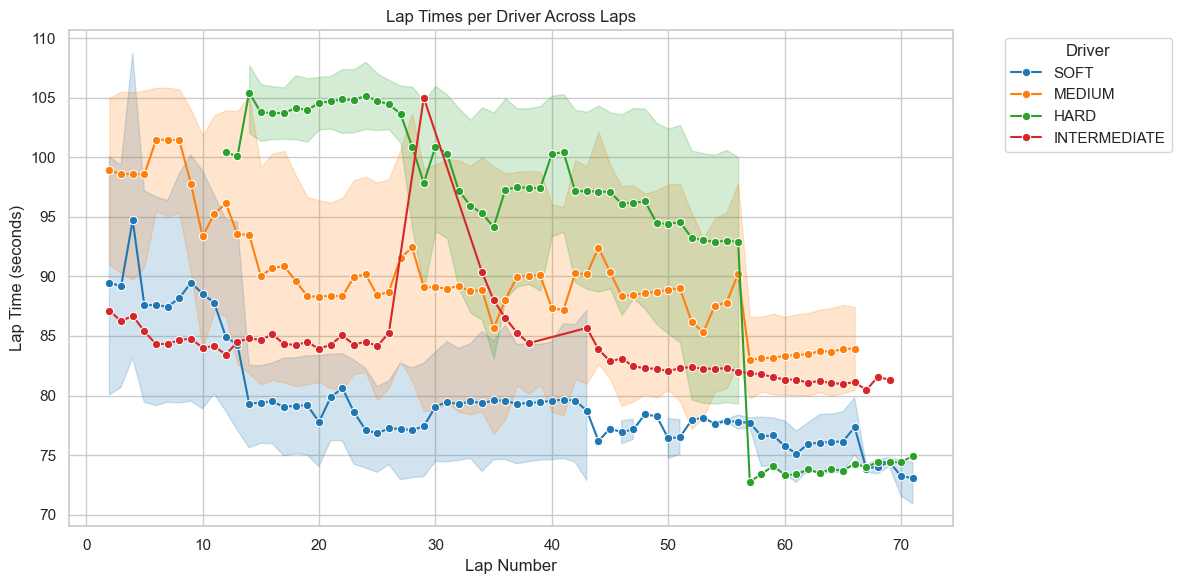

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot lap times for each driver
plt.figure(figsize=(12, 6))

driver_name = 'VER'  # Replace with the actual driver name you want to visualize
driver_df = data[data['Driver'] == driver_name]

# Using seaborn lineplot for easier grouping by 'Driver'
sns.lineplot(data=driver_df, x='LapNumber', y='LapTimeSeconds', hue='Compound', marker='o', palette='tab10')

# Set plot labels and title
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Times per Driver Across Laps")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot


# Show plot
plt.tight_layout()
plt.show()

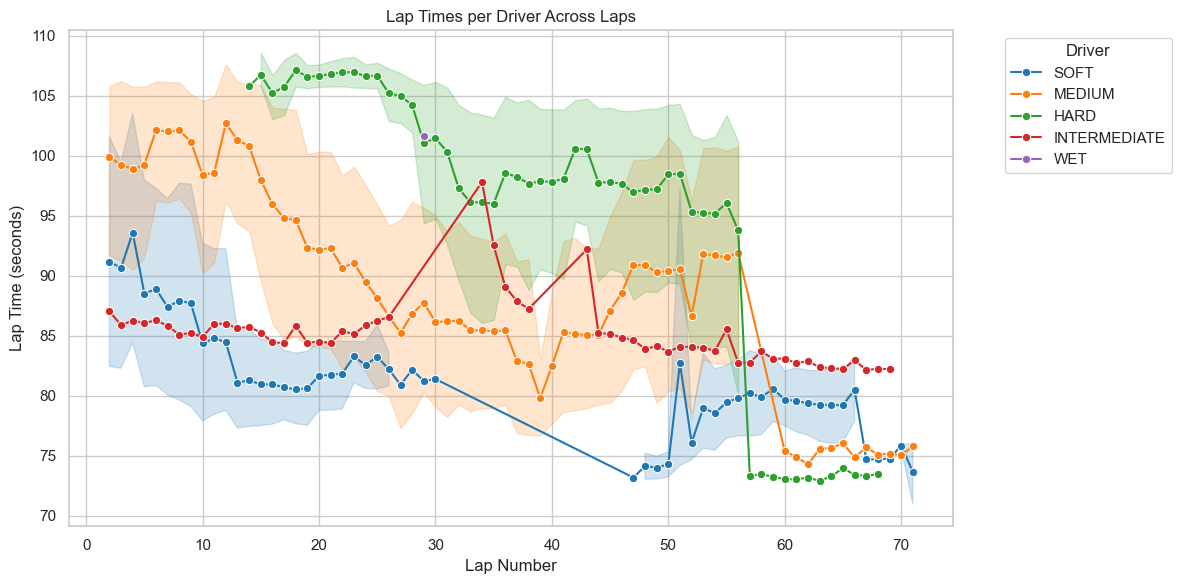

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot lap times for each driver
plt.figure(figsize=(12, 6))

driver_name = 'PER'  # Replace with the actual driver name you want to visualize
driver_df = data[data['Driver'] == driver_name]

# Using seaborn lineplot for easier grouping by 'Driver'
sns.lineplot(data=driver_df, x='LapNumber', y='LapTimeSeconds', hue='Compound', marker='o', palette='tab10')

# Set plot labels and title
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Times per Driver Across Laps")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

# Show plot
plt.tight_layout()
plt.show()

One Hot Encoded - Compound


In [17]:
data_encoded = pd.get_dummies(data, columns=[ 'Compound'], drop_first=True)
data_encoded.style.set_sticky(axis="columns")
print(data_encoded.columns)
data_encoded.head(20)

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Team',
       'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed', 'track',
       'LapTimeSeconds', 'Compound_INTERMEDIATE', 'Compound_MEDIUM',
       'Compound_SOFT', 'Compound_WET'],
      dtype='object')


,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,track,LapTimeSeconds,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_WET
0,GAS,10,2.0,1.0,5.0,Red Bull Racing,19.8,59.0,1007.0,42.0,1.6,Spain,84.591,False,False,True,False
1,GAS,10,3.0,1.0,6.0,Red Bull Racing,19.8,58.1,1007.1,41.8,3.0,Spain,83.795,False,False,True,False
2,GAS,10,4.0,1.0,7.0,Red Bull Racing,19.8,57.5,1007.1,41.8,1.5,Spain,83.635,False,False,True,False
3,GAS,10,5.0,1.0,8.0,Red Bull Racing,19.5,60.5,1007.0,41.3,2.7,Spain,83.402,False,False,True,False
4,GAS,10,6.0,1.0,9.0,Red Bull Racing,19.7,59.6,1007.0,41.3,2.5,Spain,83.408,False,False,True,False
5,GAS,10,7.0,1.0,10.0,Red Bull Racing,19.8,59.4,1006.9,41.2,2.0,Spain,83.114,False,False,True,False
6,GAS,10,8.0,1.0,11.0,Red Bull Racing,20.0,58.3,1007.0,41.2,2.6,Spain,82.874,False,False,True,False
7,GAS,10,9.0,1.0,12.0,Red Bull Racing,20.2,57.8,1007.0,41.6,2.2,Spain,83.840,False,False,True,False
8,GAS,10,10.0,1.0,13.0,Red Bull Racing,19.9,59.4,1006.9,41.2,1.9,Spain,83.436,False,False,True,False
9,GAS,10,11.0,1.0,14.0,Red Bull Racing,20.2,58.7,1006.9,41.3,2.4,Spain,83.206,False,False,True,False


Featrue Engineering on Tyre Compound


In [18]:
data_encoded['TyreDegradation'] = data_encoded['TyreLife'] * \
    (data_encoded['Compound_SOFT'] if 'Compound_SOFT' in data_encoded else 0) + \
    (data_encoded['TyreLife'] * 0.8 * (data_encoded['Compound_MEDIUM'] if 'Compound_MEDIUM' in data_encoded else 0)) + \
    (data_encoded['TyreLife'] * 0.5 * (data_encoded['Compound_HARD'] if 'Compound_HARD' in data_encoded else 0))

data_encoded.head(10)

,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,track,LapTimeSeconds,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_WET,TyreDegradation
0,GAS,10,2.0,1.0,5.0,Red Bull Racing,19.8,59.0,1007.0,42.0,1.6,Spain,84.591,False,False,True,False,5.0
1,GAS,10,3.0,1.0,6.0,Red Bull Racing,19.8,58.1,1007.1,41.8,3.0,Spain,83.795,False,False,True,False,6.0
2,GAS,10,4.0,1.0,7.0,Red Bull Racing,19.8,57.5,1007.1,41.8,1.5,Spain,83.635,False,False,True,False,7.0
3,GAS,10,5.0,1.0,8.0,Red Bull Racing,19.5,60.5,1007.0,41.3,2.7,Spain,83.402,False,False,True,False,8.0
4,GAS,10,6.0,1.0,9.0,Red Bull Racing,19.7,59.6,1007.0,41.3,2.5,Spain,83.408,False,False,True,False,9.0
5,GAS,10,7.0,1.0,10.0,Red Bull Racing,19.8,59.4,1006.9,41.2,2.0,Spain,83.114,False,False,True,False,10.0
6,GAS,10,8.0,1.0,11.0,Red Bull Racing,20.0,58.3,1007.0,41.2,2.6,Spain,82.874,False,False,True,False,11.0
7,GAS,10,9.0,1.0,12.0,Red Bull Racing,20.2,57.8,1007.0,41.6,2.2,Spain,83.840,False,False,True,False,12.0
8,GAS,10,10.0,1.0,13.0,Red Bull Racing,19.9,59.4,1006.9,41.2,1.9,Spain,83.436,False,False,True,False,13.0
9,GAS,10,11.0,1.0,14.0,Red Bull Racing,20.2,58.7,1006.9,41.3,2.4,Spain,83.206,False,False,True,False,14.0


Fuel Load Calculation


In [21]:
fuel_load_values = {
    'Baku': 51,
    'Austin': 55,
    'Brazil': 71,
    'Spain': 66
}

data_encoded['Fuel_Load']= 1-(data_encoded['LapNumber']/data_encoded['track'].map(fuel_load_values))
data_encoded.head(10)

data_encoded.to_csv('test.csv', index=False)  # `index=False` excludes the index column

print("DataFrame saved as 'test.csv'")


DataFrame saved as 'test.csv'


Boolean Columns to 0/1


In [22]:
data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)
data_encoded.head(10)
print(data.columns)


Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Compound',
       'Team', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'track', 'LapTimeSeconds'],
      dtype='object')


C:\Users\Thakk\AppData\Local\Temp\ipykernel_14468\1833284581.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)
C:\Users\Thakk\AppData\Local\Temp\ipykernel_14468\1833284581.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)
C:\Users\Thakk\AppData\Local\Temp\ipykernel_14468\1833284581.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 

Random Forest Initial


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
X = data_encoded.drop(columns=['LapTimeSeconds','Driver','Team','track'])  # Features
y = data_encoded['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1.7593645134118416
Mean Absolute Error (MAE): 0.5531345915444346
R^2 Score: 0.9895841737959798


In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and you want to scale specific columns, e.g., 'col1' and 'col2'
columns_to_scale = ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed']  # Replace with the columns you want to scale

# Initialize the scaler
scaler = StandardScaler()

data_encoded_new = data_encoded.copy()

# Fit and transform only the specified columns
data_encoded_new[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

data_encoded_new.style.set_sticky(axis="columns")
# Display the scaled DataFrame
print(data_encoded_new.columns)
data_encoded_new.head()

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Team',
       'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed', 'track',
       'LapTimeSeconds', 'Compound_INTERMEDIATE', 'Compound_MEDIUM',
       'Compound_SOFT', 'Compound_WET', 'TyreDegradation', 'Fuel_Load'],
      dtype='object')


,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,track,LapTimeSeconds,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_WET,TyreDegradation,Fuel_Load
0,GAS,10,2.0,1.0,5.0,Red Bull Racing,-1.104080,0.350855,0.713973,0.268552,-0.076321,Spain,84.591,0,0,1,0,5.0,0.96
1,GAS,10,3.0,1.0,6.0,Red Bull Racing,-1.104080,0.299152,0.716862,0.239897,1.022496,Spain,83.795,0,0,1,0,6.0,0.94
2,GAS,10,4.0,1.0,7.0,Red Bull Racing,-1.104080,0.264684,0.716862,0.239897,-0.154808,Spain,83.635,0,0,1,0,7.0,0.92
3,GAS,10,5.0,1.0,8.0,Red Bull Racing,-1.172972,0.437027,0.713973,0.168257,0.787036,Spain,83.402,0,0,1,0,8.0,0.90
4,GAS,10,6.0,1.0,9.0,Red Bull Racing,-1.127044,0.385324,0.713973,0.168257,0.630062,Spain,83.408,0,0,1,0,9.0,0.88


New Random Forest Regression

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
X = data_encoded_new.drop(columns=['LapTimeSeconds','Driver','Team','Track'])  # Features
y = data_encoded_new['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.7630023480981978
Mean Absolute Error (MAE): 0.5439672458122345
R^2 Score: 0.947991707393023


In [26]:
data_encoded_new = pd.get_dummies(data_encoded_new, columns=['Driver', 'Team','track'], drop_first=False)

print(data_encoded_new.columns)
data_encoded_new.head()

Index(['DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'AirTemp', 'Humidity',
       'Pressure', 'TrackTemp', 'WindSpeed', 'LapTimeSeconds',
       'Compound_INTERMEDIATE', 'Compound_MEDIUM', 'Compound_SOFT',
       'Compound_WET', 'TyreDegradation', 'Fuel_Load', 'Driver_ALB',
       'Driver_ALO', 'Driver_BEA', 'Driver_BOT', 'Driver_COL', 'Driver_DEV',
       'Driver_GAS', 'Driver_GIO', 'Driver_GRO', 'Driver_HAM', 'Driver_HUL',
       'Driver_KUB', 'Driver_KVY', 'Driver_LAT', 'Driver_LAW', 'Driver_LEC',
       'Driver_MAG', 'Driver_MAZ', 'Driver_MSC', 'Driver_NOR', 'Driver_OCO',
       'Driver_PER', 'Driver_PIA', 'Driver_RAI', 'Driver_RIC', 'Driver_RUS',
       'Driver_SAI', 'Driver_SAR', 'Driver_STR', 'Driver_TSU', 'Driver_VER',
       'Driver_VET', 'Driver_ZHO', 'Team_Alfa Romeo', 'Team_Alfa Romeo Racing',
       'Team_AlphaTauri', 'Team_Alpine', 'Team_Aston Martin', 'Team_Ferrari',
       'Team_Haas F1 Team', 'Team_Kick Sauber', 'Team_McLaren',
       'Team_Mercedes', 'Team_RB', '

,DriverNumber,LapNumber,Stint,TyreLife,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,...,Team_RB,Team_Racing Point,Team_Red Bull Racing,Team_Renault,Team_Toro Rosso,Team_Williams,track_Austin,track_Baku,track_Brazil,track_Spain
0,10,2.0,1.0,5.0,-1.104080,0.350855,0.713973,0.268552,-0.076321,84.591,...,False,False,True,False,False,False,False,False,False,True
1,10,3.0,1.0,6.0,-1.104080,0.299152,0.716862,0.239897,1.022496,83.795,...,False,False,True,False,False,False,False,False,False,True
2,10,4.0,1.0,7.0,-1.104080,0.264684,0.716862,0.239897,-0.154808,83.635,...,False,False,True,False,False,False,False,False,False,True
3,10,5.0,1.0,8.0,-1.172972,0.437027,0.713973,0.168257,0.787036,83.402,...,False,False,True,False,False,False,False,False,False,True
4,10,6.0,1.0,9.0,-1.127044,0.385324,0.713973,0.168257,0.630062,83.408,...,False,False,True,False,False,False,False,False,False,True


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Assuming df is your DataFrame
X = data_encoded_new.drop(columns=['LapTimeSeconds'])  # Features
y = data_encoded_new['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

n_trees = len(rf_model.estimators_)  # Number of trees in the forest
train_predictions = np.zeros((X_train.shape[0], n_trees))
test_predictions = np.zeros((X_test.shape[0], n_trees))

# Store predictions for each tree in the forest
for i, tree in enumerate(rf_model.estimators_):
    train_predictions[:, i] = tree.predict(X_train)
    test_predictions[:, i] = tree.predict(X_test)

# Calculate the average prediction across all trees for both train and test data
avg_train_predictions = np.mean(train_predictions, axis=1)
avg_test_predictions = np.mean(test_predictions, axis=1)

# Calculate Bias: difference between the mean of predictions and the true value
train_bias = np.mean(avg_train_predictions - y_train)
test_bias = np.mean(avg_test_predictions - y_test)

# Calculate Variance: variance of the predictions for the test set
train_variance = np.mean(np.var(train_predictions, axis=1))
test_variance = np.mean(np.var(test_predictions, axis=1))

# Print the results
print(f"Train Bias: {train_bias}")
print(f"Test Bias: {test_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Variance: {test_variance}")

Mean Squared Error (MSE): 1.6711155041140144
Mean Absolute Error (MAE): 0.47722743433994835
R^2 Score: 0.9901066274072219
Train Bias: 0.003498291589614654
Test Bias: 0.006698407937877593
Train Variance: 0.6190733347163156
Test Variance: 1.194863118150355


In [34]:
X_train.columns

Index(['DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'AirTemp', 'Humidity',
       'Pressure', 'TrackTemp', 'WindSpeed', 'Compound_MEDIUM',
       'Compound_SOFT', 'TyreDegradation', 'Fuel_Load', 'Driver_ALB',
       'Driver_ALO', 'Driver_BEA', 'Driver_BOT', 'Driver_COL', 'Driver_DEV',
       'Driver_GAS', 'Driver_GIO', 'Driver_GRO', 'Driver_HAM', 'Driver_HUL',
       'Driver_KUB', 'Driver_KVY', 'Driver_LAT', 'Driver_LAW', 'Driver_LEC',
       'Driver_MAG', 'Driver_MAZ', 'Driver_MSC', 'Driver_NOR', 'Driver_OCO',
       'Driver_PER', 'Driver_PIA', 'Driver_RAI', 'Driver_RIC', 'Driver_RUS',
       'Driver_SAI', 'Driver_SAR', 'Driver_STR', 'Driver_TSU', 'Driver_VER',
       'Driver_VET', 'Driver_ZHO', 'Team_Alfa Romeo', 'Team_Alfa Romeo Racing',
       'Team_AlphaTauri', 'Team_Alpine', 'Team_Aston Martin', 'Team_Ferrari',
       'Team_Haas F1 Team', 'Team_Kick Sauber', 'Team_McLaren',
       'Team_Mercedes', 'Team_RB', 'Team_Racing Point', 'Team_Red Bull Racing',
       'Team_Renault',

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your features (X) and target (y)
X = data_encoded_new.drop('LapTimeSeconds', axis=1)  # Drop your target variable from features
y = data_encoded_new['LapTimeSeconds']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error (MSE): 1.3170268326415404
Mean Absolute Error (MAE): 0.6457865249545854
R^2 Score: 0.9117160857119799


In [6]:
import pandas as pd

def predict_lap_time(driver_number, lap_number, stint, tyre_life, air_temp, humidity, pressure, track_temp,
                     wind_speed, compound, team, driver, track):
    # Initialize a dictionary with all features, setting default values for one-hot encoded columns
    feature_dict = {col: 0 for col in data_encoded.columns if col != 'LapTimeSeconds'}

    # Fill in provided values for numeric features
    feature_dict['DriverNumber'] = driver_number
    feature_dict['LapNumber'] = lap_number
    feature_dict['Stint'] = stint
    feature_dict['TyreLife'] = tyre_life
    feature_dict['AirTemp'] = air_temp
    feature_dict['Humidity'] = humidity
    feature_dict['Pressure'] = pressure
    feature_dict['TrackTemp'] = track_temp
    feature_dict['WindSpeed'] = wind_speed

    # One-hot encode Compound, Team, Driver, and Track based on training data
    compound_column = f'Compound_{compound.upper()}'
    if compound_column in feature_dict:
        feature_dict[compound_column] = 1

    team_column = f'Team_{team}'
    if team_column in feature_dict:
        feature_dict[team_column] = 1

    driver_column = f'Driver_{driver}'
    if driver_column in feature_dict:
        feature_dict[driver_column] = 1

    track_column = f'Track_{track}'
    if track_column in feature_dict:
        feature_dict[track_column] = 1

    # Additional engineered features
    feature_dict['TyreDegradation'] = feature_dict['TyreLife'] * (feature_dict.get('Compound_SOFT', 0) +
                                                                  0.8 * feature_dict.get('Compound_MEDIUM', 0) +
                                                                  0.5 * feature_dict.get('Compound_HARD', 0))
    feature_dict['Fuel_Load'] = 1 - lap_number / 50  # Example fuel load calculation

    # Convert feature dictionary to a DataFrame
    input_df = pd.DataFrame([feature_dict])
    print(input_df)
    # Ensure columns align with model expectations
    input_df = input_df.reindex(columns=rf_model.feature_names_in_, fill_value=0)

    # Predict lap time using the model
    predicted_lap_time = rf_model.predict(input_df)[0]

    return predicted_lap_time

# Example usage
predicted_time = predict_lap_time(
    driver_number=10,
    lap_number=25,
    stint=1,
    tyre_life=11,
    air_temp=20.1,
    humidity=51.1,
    pressure=1013.9,
    track_temp=41.3,
    wind_speed=5.1,
    compound="hard",
    team="Mercedes",
    driver="HAM",
    track="Austin"
)

print(f"Predicted Lap Time: {predicted_time:.2f} seconds")




NameError: name 'data_encoded' is not defined